In [5]:
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import numpy as np
import os
from PIL import Image
#from sklearn import PCA
#import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.linalg import svd


In [6]:
def is_image_readable(file_path):
    try:
        # Try to open the image
        img = Image.open(file_path)
        img.close()
        return True
    except Exception as e:
        # If there is an exception, the image is unreadable
        print(f"Unreadable image: {file_path}")
        return False

In [7]:
face_images=[]
input_data=[0]*2429
#for i in range(2429):
dir='/Users/ushakiranmayee/Documents/ML/DATASETS/faces'
img_files=os.listdir(dir)

files_names=[f for f in img_files if f.endswith('.pgm')]

readable_images = [img for img in files_names if is_image_readable(os.path.join(dir, img))]

print(len(img_files))
for img in img_files:
        img_path=os.path.join(dir,img)
        images = mpimg.imread(img_path)
        if img is not None:
            face_images.append(images.flatten())
        # print("img: ",images)
        # input_data.append(images)
face_images=np.array(face_images)
print(face_images.shape)

2429
(2429, 361)


(361, 361)


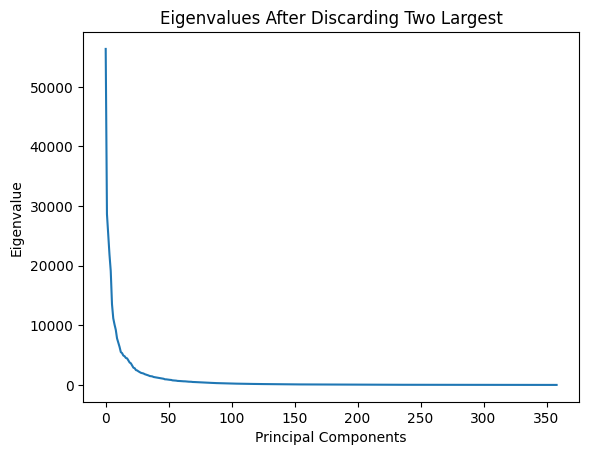

In [42]:
#1. PCA on the face Images

mean_face = np.mean(face_images, axis=0)
centered_faces = face_images - mean_face
# U,S,Vt=np.linalg.svd(centered_faces)
# print(Vt.shape)
# reduced_eigenvalues=S[2:]
cov_matrix = np.cov(centered_faces.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(eigenvectors.shape)
#Discarding the largest 2 eigen values and sorting in descending order
num_discard = 2
sorted_indices = np.argsort(eigenvalues)[::-1]
reduced_indices = sorted_indices[num_discard:]

eigenvalues = eigenvalues[reduced_indices]
eigenvectors = eigenvectors[:, reduced_indices]

plt.plot(eigenvalues)
plt.title('Eigenvalues After Discarding Two Largest')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalue')
plt.show()

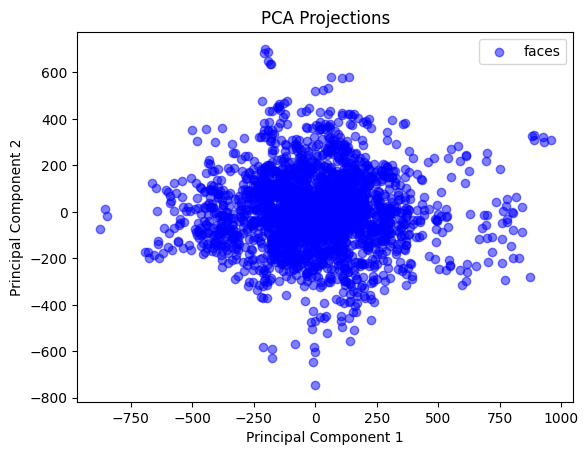

In [43]:
#2. Graph projecting the data points onto the first 2 principal components
projected_pts=np.dot(centered_faces,eigenvectors[:,:2])
plt.scatter(projected_pts[:,0],projected_pts[:,1],alpha=0.5,color='blue',label='faces')
plt.title('PCA Projections')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

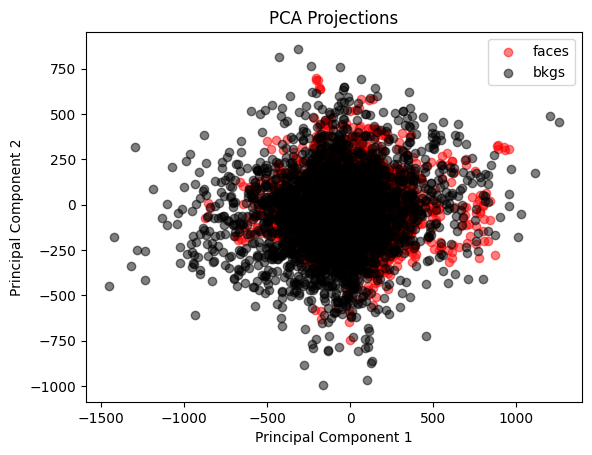

In [44]:
#3. Projections from the face and the background dataset onto the first 2 principal components

bg_images=[]
bkg_data_dir='/Users/ushakiranmayee/Documents/ML/DATASETS/background'
bkg_img_files=os.listdir(bkg_data_dir)

bkg_files_names=[f for f in bkg_img_files if f.endswith('.pgm')]
bkg_readable_images = [img for img in bkg_files_names if is_image_readable(os.path.join(bkg_data_dir, img))]

for img in bkg_readable_images:
        img_path=os.path.join(bkg_data_dir,img)
        images = mpimg.imread(img_path)
        if img is not None:
            bg_images.append(images.flatten())
bg_images=np.array(bg_images)

#Subtracting mean_face from bg_Images
bg_centered_images=bg_images-mean_face
projected_faces=np.dot(centered_faces,eigenvectors[:,:2])
projected_bg=np.dot(bg_centered_images,eigenvectors[:,:2])
plt.scatter(projected_faces[:,0],projected_faces[:,1],alpha=0.5,color='red',label='faces')
plt.scatter(projected_bg[:,0],projected_bg[:,1],alpha=0.5,color='black',label='bkgs')
plt.title('PCA Projections')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [45]:
#4.Using the model from a), display the image face_00067.pgm and its recon-
#struction using 20 PCs.

input_img='/Users/ushakiranmayee/Documents/ML/DATASETS/faces/face00067.pgm'
input_img=mpimg.imread(input_img)
input_img=np.array(input_img)

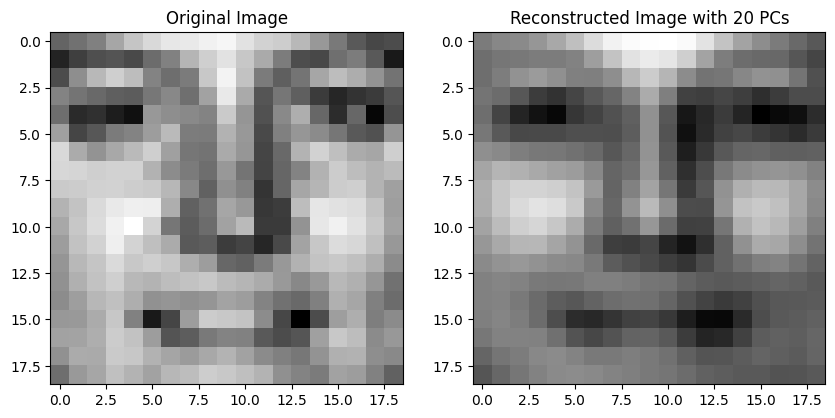

In [46]:
centroid_input=input_img.reshape(1,-1)-mean_face
proj_img=np.dot(centroid_input,eigenvectors[:,:20])
reconstructed_img=(mean_face+np.dot(proj_img,eigenvectors[:,:20].T)).reshape(input_img.shape)
# Original Image
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(input_img, cmap='gray')
plt.title('Original Image')

# Reconstructed Image
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img, cmap='gray')
plt.title('Reconstructed Image with 20 PCs')

plt.show()

In [57]:
#5. Using the model from a), display the image B1_00192.pgm and its reconstruction using 20 PCs.

(1, 361) (361,)
(1, 20)


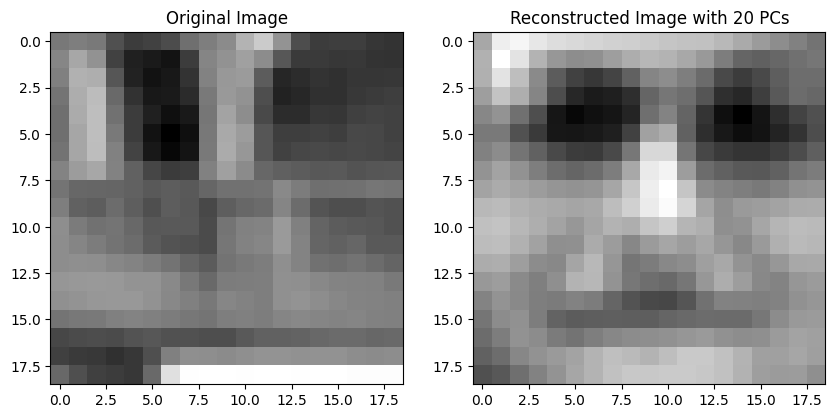

In [47]:
input_img='/Users/ushakiranmayee/Documents/ML/DATASETS/background/B1_00192.pgm'
input_img=mpimg.imread(input_img)
input_img=np.array(input_img)
centered_ip_img=input_img.reshape(1,-1)-mean_face
print(centered_ip_img.shape,mean_face.shape)
proj_img=np.dot(centered_ip_img,eigenvectors[:,:20])
print(proj_img.shape)
reconstructed_img=(mean_face+np.dot(proj_img,eigenvectors[:,:20].T)).reshape(input_img.shape)
# Original Image
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(input_img, cmap='gray')
plt.title('Original Image')

# Reconstructed Image
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img, cmap='gray')
plt.title('Reconstructed Image with 20 PCs')

plt.show()

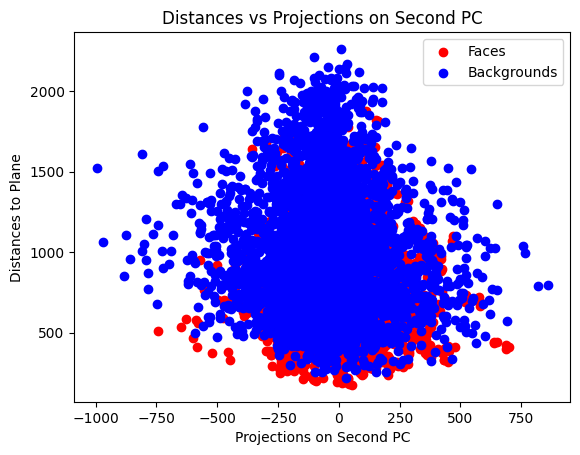

In [49]:
# 6. Compute the distances of the faces and the background points to the plane gener-
# ated by the 20 largest PCs. On the same graph, plot the computed distances (on
# the y-axis) vs the coordinates of the projections on the second PC (on the x-axis)
# for the faces and background patches using two different colors.

face_projections = np.dot(centered_faces, eigenvectors[:,:20])
background_projections = np.dot(bg_centered_images ,eigenvectors[:,:20])


# Compute the distances of the faces and background points to the plane
face_distances = np.linalg.norm(centered_faces - np.dot(face_projections, eigenvectors[:,:20].T), axis=1)
background_distances = np.linalg.norm(bg_centered_images - np.dot(background_projections, eigenvectors[:,:20].T), axis=1)

# Plot the distances versus the coordinates on the second PC
plt.scatter(face_projections[:, 1], face_distances, color='red', label='Faces')
plt.scatter(background_projections[:, 1], background_distances, color='blue', label='Backgrounds')

plt.title('Distances vs Projections on Second PC')
plt.xlabel('Projections on Second PC')
plt.ylabel('Distances to Plane')
plt.legend()
plt.show()

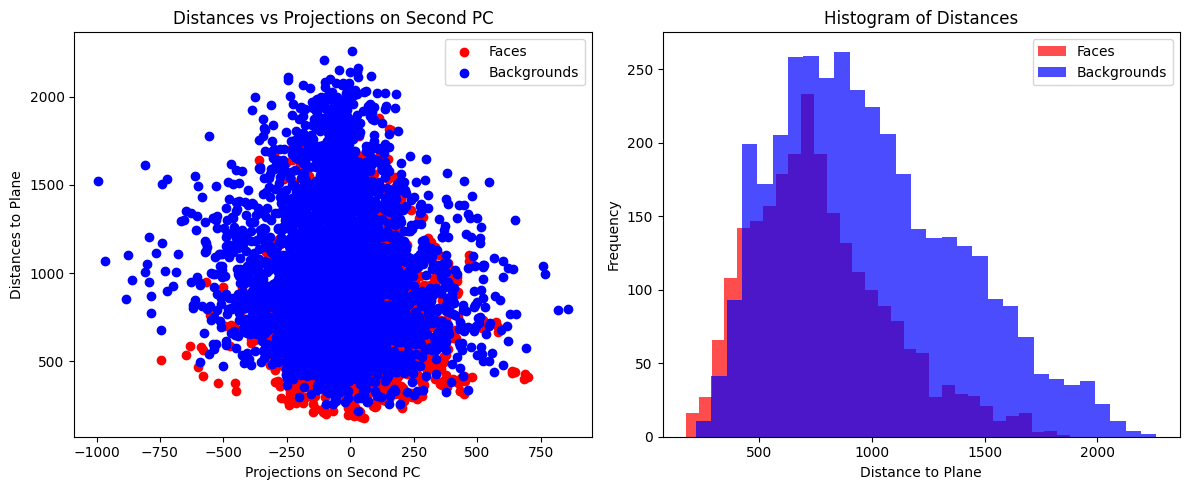

In [50]:
plt.figure(figsize=(12, 5))

# Plot 1: Distances vs Projections on Second PC
plt.subplot(1, 2, 1)
plt.scatter(face_projections[:, 1], face_distances, color='red', label='Faces')
plt.scatter(background_projections[:, 1], background_distances, color='blue', label='Backgrounds')

plt.title('Distances vs Projections on Second PC')
plt.xlabel('Projections on Second PC')
plt.ylabel('Distances to Plane')
plt.legend()

#Plot 2: 
plt.subplot(1, 2, 2)
plt.hist(face_distances, bins=30, color='red', alpha=0.7, label='Faces')
plt.hist(background_distances, bins=30, color='blue', alpha=0.7, label='Backgrounds')
plt.title('Histogram of Distances')
plt.xlabel('Distance to Plane')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()